# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import os
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

cities_list=[]

print('Beginning Data Retrieval')
print('---------------------')
record_count=1
set_count=1

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    city_url = url+ "&q=" + city
    record_count +=1
    response = requests.get(city_url).json()
    try:
        #print(city_url)
        #response = requests.get(city_url).json()
        
        lat=response['coord']['lat']
        lng= response['coord']['lon']
        max_temp= response['main']['temp_max']
        humidity= response['main']['humidity']
        cloudiness= response['clouds']['all']
        wind_speed=response['wind']['speed']
        country=response['sys']['country']
        date=response['dt']
        cities_list.append({"city":city,
                         "Lat" : lat,
                        "Lng":lng,
                         "Max Temp":max_temp,
                         "Humidity":humidity,
                         "Cloudiness":cloudiness,
                         "Wind Speed":wind_speed,
                         "Country":country,
                         "Date":date
                        })
        print(f"Processing {record_count} of {set_count} |   {city}")
    except:
        print("city not found")
        pass
                          
print('---------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
---------------------
Processing 2 of 1 |   ushuaia
Processing 3 of 1 |   warrington
Processing 4 of 1 |   mount gambier
Processing 5 of 1 |   cabo san lucas
Processing 6 of 1 |   brentwood
Processing 7 of 1 |   anda
Processing 8 of 1 |   yellowknife
Processing 9 of 1 |   caravelas
Processing 10 of 1 |   moose factory
Processing 11 of 1 |   lukovetskiy
Processing 12 of 1 |   constitucion
Processing 13 of 1 |   kapaa
Processing 14 of 1 |   at-bashi
Processing 15 of 1 |   husavik
Processing 16 of 1 |   ilulissat
city not found
Processing 18 of 1 |   busselton
Processing 19 of 1 |   puerto baquerizo moreno
city not found
Processing 21 of 1 |   beloha
city not found
Processing 23 of 1 |   bluff
Processing 24 of 1 |   tuktoyaktuk
Processing 25 of 1 |   beringovskiy
city not found
Processing 27 of 1 |   ranong
Processing 28 of 1 |   mataura
Processing 29 of 1 |   broken hill
Processing 30 of 1 |   avarua
Processing 31 of 1 |   huaidian
Processing 32 of 1 |   vaini
Pr

Processing 13 of 6 |   kandi
Processing 14 of 6 |   isangel
Processing 15 of 6 |   eureka
Processing 16 of 6 |   omboue
Processing 17 of 6 |   lagoa
Processing 18 of 6 |   maunabo
Processing 19 of 6 |   sibu
Processing 20 of 6 |   zaysan
Processing 21 of 6 |   port blair
Processing 22 of 6 |   sorong
Processing 23 of 6 |   sandakan
Processing 24 of 6 |   saint anthony
Processing 25 of 6 |   bogorodskoye
Processing 26 of 6 |   upernavik
Processing 27 of 6 |   tarakan
Processing 28 of 6 |   beipiao
Processing 29 of 6 |   salina
Processing 30 of 6 |   vestmannaeyjar
Processing 31 of 6 |   torbay
Processing 32 of 6 |   mahanoro
Processing 33 of 6 |   bull savanna
Processing 34 of 6 |   guadalupe y calvo
city not found
Processing 36 of 6 |   euclides da cunha
Processing 37 of 6 |   petauke
Processing 38 of 6 |   geraldton
Processing 39 of 6 |   mizdah
Processing 40 of 6 |   necochea
Processing 41 of 6 |   vagur
Processing 42 of 6 |   todos santos
Processing 43 of 6 |   road town
Processing 

Processing 31 of 11 |   pringsewu
Processing 32 of 11 |   glenwood springs
city not found
Processing 34 of 11 |   kaduqli
Processing 35 of 11 |   caucaia
Processing 36 of 11 |   tabou
Processing 37 of 11 |   tezu
Processing 38 of 11 |   novorudnyy
Processing 39 of 11 |   pingliang
Processing 40 of 11 |   itapaci
Processing 41 of 11 |   tucupita
Processing 42 of 11 |   shemonaikha
Processing 43 of 11 |   sola
city not found
Processing 45 of 11 |   inuvik
Processing 46 of 11 |   wanaka
Processing 47 of 11 |   shu
Processing 48 of 11 |   delta del tigre
Processing 49 of 11 |   boende
Processing 50 of 11 |   pathalgaon
Processing 1 of 12 |   fengzhen
Processing 2 of 12 |   ghatampur
Processing 3 of 12 |   bageshwar
Processing 4 of 12 |   casper
Processing 5 of 12 |   port hedland
Processing 6 of 12 |   lapeer
city not found
Processing 8 of 12 |   ornskoldsvik
Processing 9 of 12 |   carbonia
Processing 10 of 12 |   kampot
Processing 11 of 12 |   vieux fort
Processing 12 of 12 |   nelson bay

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:

weather = pd.DataFrame(cities_list)
weather.head()

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.80,-68.30,42.80,70,75,11.41,AR,1603497737
1,warrington,53.39,-2.58,46.99,81,40,11.41,GB,1603497737
2,mount gambier,-37.83,140.77,55.40,54,75,21.92,AU,1603497737
3,cabo san lucas,22.89,-109.91,88.00,58,5,11.41,MX,1603497669
4,brentwood,40.78,-73.25,64.40,93,90,9.17,US,1603497662


In [11]:
weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,19.688640,18.510107,59.420286,75.751342,54.388193,7.834776,1.603497e+09
std,33.742205,90.641029,20.558783,19.698827,37.607784,5.583995,1.430030e+02
min,-54.800000,-179.170000,-4.000000,10.000000,0.000000,0.540000,1.603497e+09
25%,-8.560000,-63.770000,43.000000,68.000000,19.500000,3.555000,1.603497e+09
50%,20.890000,21.700000,66.200000,80.000000,66.000000,6.420000,1.603497e+09
75%,49.025000,99.780000,77.000000,91.000000,90.000000,10.600000,1.603497e+09
max,78.220000,179.320000,89.600000,100.000000,100.000000,36.910000,1.603498e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#skip

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

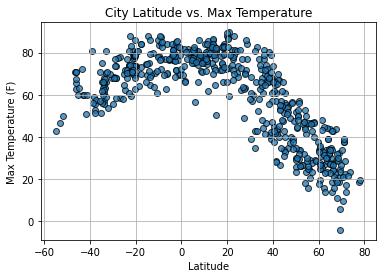

In [13]:
plt.title(f"City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.scatter(weather['Lat'],weather["Max Temp"],alpha=0.75,edgecolors='black')

## Latitude vs. Humidity Plot

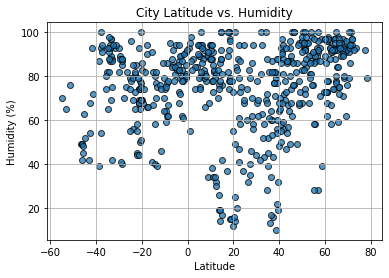

In [14]:
plt.title(f"City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.scatter(weather['Lat'],weather["Humidity"],alpha=0.75,edgecolors='black')

## Latitude vs. Cloudiness Plot

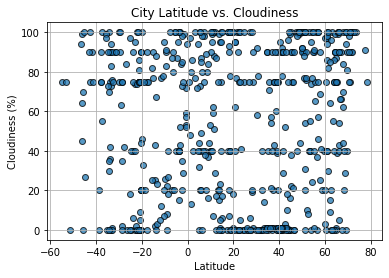

In [15]:
plt.title(f"City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.scatter(weather['Lat'],weather["Cloudiness"],alpha=0.75,edgecolors='black')

## Latitude vs. Wind Speed Plot

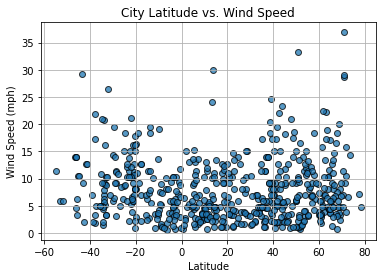

In [16]:
plt.title(f"City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.scatter(weather['Lat'],weather["Wind Speed"],alpha=0.75,edgecolors='black')

In [ ]:
Observation:
-Cities with approximate 20 lattitude have the highest temperatures

-cities with  latitude between 0 -20 have lower windspeed compared to others latitude

-city with the lowest lattitude value has the lowest humdity percent 

## Linear Regression

In [38]:
# Create Northern and Southern Hemisphere dataFrames
northern=weather.loc[weather.Lat >= 0].reset_index(drop=True)
southern = weather[weather.Lat < 0].reset_index(drop=True)
#northern.head()
southern.head()

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.80,-68.30,42.80,70,75,11.41,AR,1603497737
1,mount gambier,-37.83,140.77,55.40,54,75,21.92,AU,1603497737
2,caravelas,-17.71,-39.25,72.99,90,90,7.05,BR,1603497738
3,constitucion,-35.33,-72.42,51.26,82,0,10.87,CL,1603497560
4,busselton,-33.65,115.33,57.00,69,0,8.99,AU,1603497740


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8730007169720485


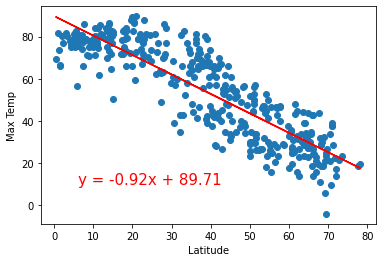

In [35]:
correlation = st.pearsonr(northern['Lat'],northern["Max Temp"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern['Lat'],northern["Max Temp"])
regress_values = northern['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern['Lat'],northern["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.plot(northern['Lat'],regress_values,"r-")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6437424344515787


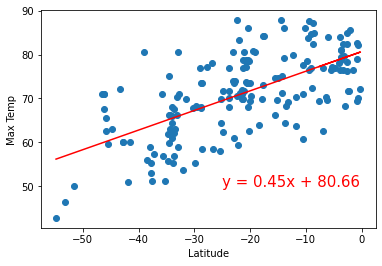

In [43]:
correlation = st.pearsonr(southern['Lat'],southern["Max Temp"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern['Lat'],southern["Max Temp"])
regress_values = southern['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern['Lat'],southern["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
plt.plot(southern['Lat'],regress_values,"r-")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2337570204226736


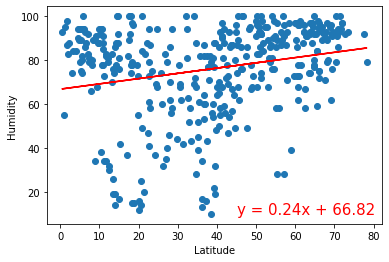

In [48]:
correlation = st.pearsonr(northern['Lat'],northern["Humidity"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern['Lat'],northern["Humidity"])
regress_values = northern['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern['Lat'],northern["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.plot(northern['Lat'],regress_values,"r-")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.153058026686544


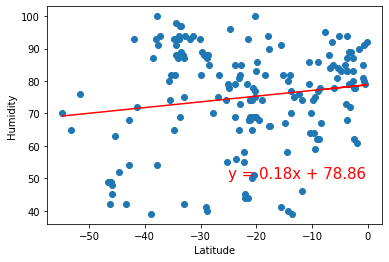

In [49]:
correlation = st.pearsonr(southern['Lat'],southern["Humidity"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern['Lat'],southern["Humidity"])
regress_values = southern['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern['Lat'],southern["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
plt.plot(southern['Lat'],regress_values,"r-")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.12522010370874065


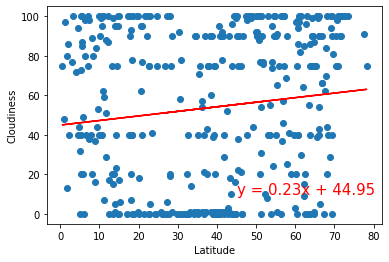

In [50]:
correlation = st.pearsonr(northern['Lat'],northern["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern['Lat'],northern["Cloudiness"])
regress_values = northern['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern['Lat'],northern["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.plot(northern['Lat'],regress_values,"r-")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.04380318626982932


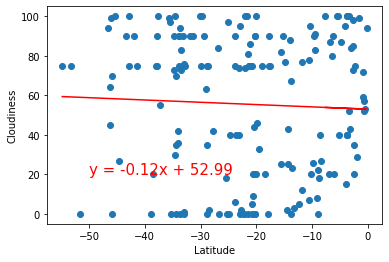

In [53]:
correlation = st.pearsonr(southern['Lat'],southern["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern['Lat'],southern["Cloudiness"])
regress_values = southern['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern['Lat'],southern["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.plot(southern['Lat'],regress_values,"r-")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.16564038733986072


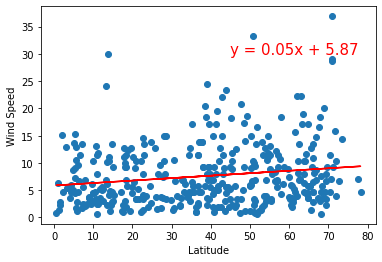

In [55]:
correlation = st.pearsonr(northern['Lat'],northern["Wind Speed"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern['Lat'],northern["Wind Speed"])
regress_values = northern['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern['Lat'],northern["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.plot(northern['Lat'],regress_values,"r-")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.25256691804272896


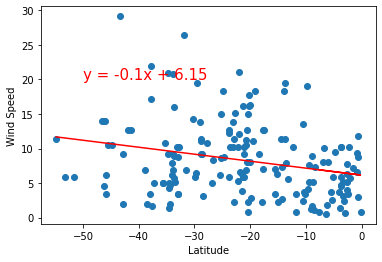

In [56]:
correlation = st.pearsonr(southern['Lat'],southern["Wind Speed"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern['Lat'],southern["Wind Speed"])
regress_values = southern['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern['Lat'],southern["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.plot(southern['Lat'],regress_values,"r-")
plt.show()

In [ ]:
Observation:
-Very weak correlation between northern and southern hemispheres:
--most of the wind speeds are below 20 mph for northern latitude but in southern latitude
--most of the wind speeds are scattered below 15-20 mph.